<a href="https://colab.research.google.com/github/MdMamunSheikh/Ataxia-Dataset/blob/Pose/yolov8/YOLO_v8_Pose_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Libaraies

In [ ]:
!pip install ultralytics

In [104]:
import ultralytics as ut
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
import os
import time
import pickle
import numpy as np
ut.checks()

Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.8/78.2 GB disk)


In [72]:
st = time.time()
ft = time.time()
ft-st

0.00011610984802246094

In [150]:

class Pose(object):
  def __init__(self, source='/', root=None):
    # Init the root directory
    self.root = os.getcwd() if root is None else root
    os.chdir(self.root)
    self.count = -1

    self.source = source if os.path.isfile(source) else None
    self.dir = source if os.path.isdir(source) else None


  def process_frame(self, frame):
    st = time

    self.pose = self.model(frame, verbose=False)
    self.data = self.pose[0]

    if self.save_kpt:
      self.kpts.append({
          'size': self.data.orig_shape,
          'boxes': {'conf': self.data.boxes.conf.to('cpu').numpy(), 'xyxy': self.data.boxes.xyxy.to('cpu').numpy()},
          'kpts': {'conf': self.data.keypoints.conf.to('cpu').numpy(), 'xy': self.data.keypoints.xy.to('cpu').numpy()}
          })

    if self.save_video:
      self.image = self.pose[0].plot(conf = True, labels = True, line_width = 2, kpt_radius = 5, font_size = 12)
      cv2.waitKey(1)
      self.video_writer.write(self.image)



  def process_video(self):
    self.init_writer()

    self.frame = 1
    a = self.frame
    st = time.time()
    s = time.time()

    while self.cap.isOpened():
      success, frame = self.cap.read()

      ft = time.time()
      if (ft-st) >= 1:
        print(f"Video --> {self.name}.mp4 | Frame --> {self.frame} | FPS --> {int((self.frame-a)/(ft-st))}")
        st = ft
        a = self.frame
      self.frame += 1
      if success:
        self.process_frame(frame)
      else:
        print(f"{self.name}.mp4 completed | Total Frame {self.frame_count} | Average FPS {int(self.frame_count/(time.time()-s))} | Total Time {(time.time()-s):.2f} sec")
        break
    if self.save_kpt:
      with open(self.kpt_writer, 'wb') as file:
        pickle.dump(self.kpts, file)

    if self.save_video:
      self.video_writer.release()
    self.cap.release()
    cv2.destroyAllWindows()


  def load_model(self, weights='yolov8x-pose.pt'):
    self.model = YOLO(weights)
    self.model_name = weights.split('-')[0]


  def init_writer(self, out_dir='output', save_video = True, save_kpt = True):
    self.save_video = save_video
    self.save_kpt = save_kpt

    if self.save_kpt:
      self.kpts_path = os.path.join(self.root, f"{out_dir}/keypoints/{self.model_name}")
      os.makedirs(self.kpts_path) if not os.path.exists(self.kpts_path) else None
      self.kpt_writer = os.path.join(self.kpts_path, f"{self.name}_{self.model_name}_kpts.pkl")
      self.kpts = []

    if self.save_video:
      self.video_path = os.path.join(self.root, f"{out_dir}/video/{self.model_name}")
      os.makedirs(self.video_path) if not os.path.exists(self.video_path) else None
      self.video_writer = cv2.VideoWriter(os.path.join(self.video_path, f"{self.name}_{self.model_name}.mp4"), cv2.VideoWriter_fourcc(*'mp4v'), self.fps, self.size)




  def run(self):
    self.preprocess()
    self.load_model()
    if self.dir is None:
      self.process_video()
    else:
      while self.count < len(self.files):
        self.process_video()
        self.update()

  def preprocess(self):
    #Video property
    self.files = self.get_files() if self.dir is not None else None

    # Update the info
    self.update()

    # storage
    self.save_video = False
    self.save_kpt = False


  def update(self):
    if self.dir is not None:
      self.count += 1
      self.source = os.path.join(self.dir, self.files[self.count])

    self.cap = cv2.VideoCapture(self.source)
    self.get_info()


  def get_info(self):
    self.h = int(self.cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    self.w = int(self.cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    self.size = (self.w, self.h)
    self.fps = int(self.cap.get(cv2.CAP_PROP_FPS))
    self.frame_count = int(self.cap.get(cv2.CAP_PROP_FRAME_COUNT))
    self.name = self.source.split('/')[-1].split('.')[0]

  def get_files(self):
    if self.dir is None:
      return None
    for root, dir, files in os.walk(self.dir):
      file = [f if f.endswith('.mp4') else None for f in files]
      file.sort()
      return file


In [ ]:
pose = Pose(root="/content/drive/MyDrive/ML/Pose Estimation/YOLO-v8-Pose", source = "../yolov7-pose-estimation/videos/Ataxia Dataset/Data/")
pose.run()

Video --> 0.mp4 | Frame --> 3 | FPS --> 1
Video --> 0.mp4 | Frame --> 15 | FPS --> 11
Video --> 0.mp4 | Frame --> 27 | FPS --> 11
Video --> 0.mp4 | Frame --> 39 | FPS --> 11
Video --> 0.mp4 | Frame --> 53 | FPS --> 13
Video --> 0.mp4 | Frame --> 68 | FPS --> 14
Video --> 0.mp4 | Frame --> 83 | FPS --> 14
Video --> 0.mp4 | Frame --> 99 | FPS --> 15
Video --> 0.mp4 | Frame --> 114 | FPS --> 14
Video --> 0.mp4 | Frame --> 129 | FPS --> 14
Video --> 0.mp4 | Frame --> 145 | FPS --> 15
Video --> 0.mp4 | Frame --> 161 | FPS --> 15
0.mp4 completed | Total Frame 174 | Average FPS 13 | Total Time 13.33 sec
Video --> 1.mp4 | Frame --> 16 | FPS --> 14
Video --> 1.mp4 | Frame --> 29 | FPS --> 12
Video --> 1.mp4 | Frame --> 42 | FPS --> 12
Video --> 1.mp4 | Frame --> 55 | FPS --> 12
Video --> 1.mp4 | Frame --> 68 | FPS --> 12
Video --> 1.mp4 | Frame --> 83 | FPS --> 14
Video --> 1.mp4 | Frame --> 98 | FPS --> 14
Video --> 1.mp4 | Frame --> 113 | FPS --> 14
Video --> 1.mp4 | Frame --> 128 | FPS --> 1

In [137]:
with open('/content/drive/MyDrive/ML/Pose Estimation/YOLO-v8-Pose/output/keypoints/yolov8x/71_yolov8x_kpts.pkl', 'rb') as file:
  pose = pickle.load(file)
pose[0]

{'size': (720, 1280),
 'boxes': {'conf': array([    0.93306,     0.90836], dtype=float32),
  'xyxy': array([[        605,         161,         839,         716],
         [        316,         105,         477,         711]], dtype=float32)},
 'kpts': {'conf': array([[  0.0097307,   0.0061849,   0.0031295,     0.86623,     0.75958,     0.99907,     0.99474,     0.99271,      0.8947,     0.90798,     0.51105,     0.99958,     0.99885,     0.99742,     0.99123,     0.96679,     0.91865],
         [    0.41939,    0.014144,     0.58587,    0.010122,     0.93395,     0.80226,      0.9965,     0.19506,       0.995,      0.2264,     0.98545,     0.98767,     0.99868,     0.99034,     0.99923,     0.97046,     0.99514]], dtype=float32),
  'xy': array([[[          0,           0],
          [          0,           0],
          [          0,           0],
          [     685.64,      215.56],
          [     743.81,      212.71],
          [      660.6,      281.58],
          [     778.25,   

In [133]:
d = {
    'size': data.orig_shape,
    'boxes': {'conf': data.boxes.conf.to('cpu').numpy(), 'xyxy': data.boxes.xyxy.to('cpu').numpy()},
    'kpts': {'conf': data.keypoints.conf.to('cpu').numpy(), 'xy': data.keypoints.xy.to('cpu').numpy()}

     }
d

{'size': (1088, 1920),
 'boxes': {'conf': array([    0.93649,     0.90735], dtype=float32),
  'xyxy': array([[        946,          51,        1282,         864],
         [        544,         106,         846,         944]], dtype=float32)},
 'kpts': {'conf': array([[   0.016925,   0.0069713,    0.006652,     0.83796,     0.83042,     0.99882,     0.99895,     0.99052,     0.99078,     0.93918,     0.93558,     0.99987,     0.99988,     0.99961,      0.9996,     0.99613,     0.99595],
         [    0.64855,    0.072437,      0.7804,    0.055466,     0.95255,     0.87352,     0.99736,     0.20975,     0.99201,     0.17998,     0.96732,     0.98494,     0.99812,     0.98452,     0.99849,     0.96485,     0.99345]], dtype=float32),
  'xy': array([[[          0,           0],
          [          0,           0],
          [          0,           0],
          [     1075.5,      116.37],
          [     1159.1,      118.71],
          [     1030.2,      207.22],
          [     1207.7,  

In [138]:
data = pose[0][0]
data.boxes

KeyError: ignored

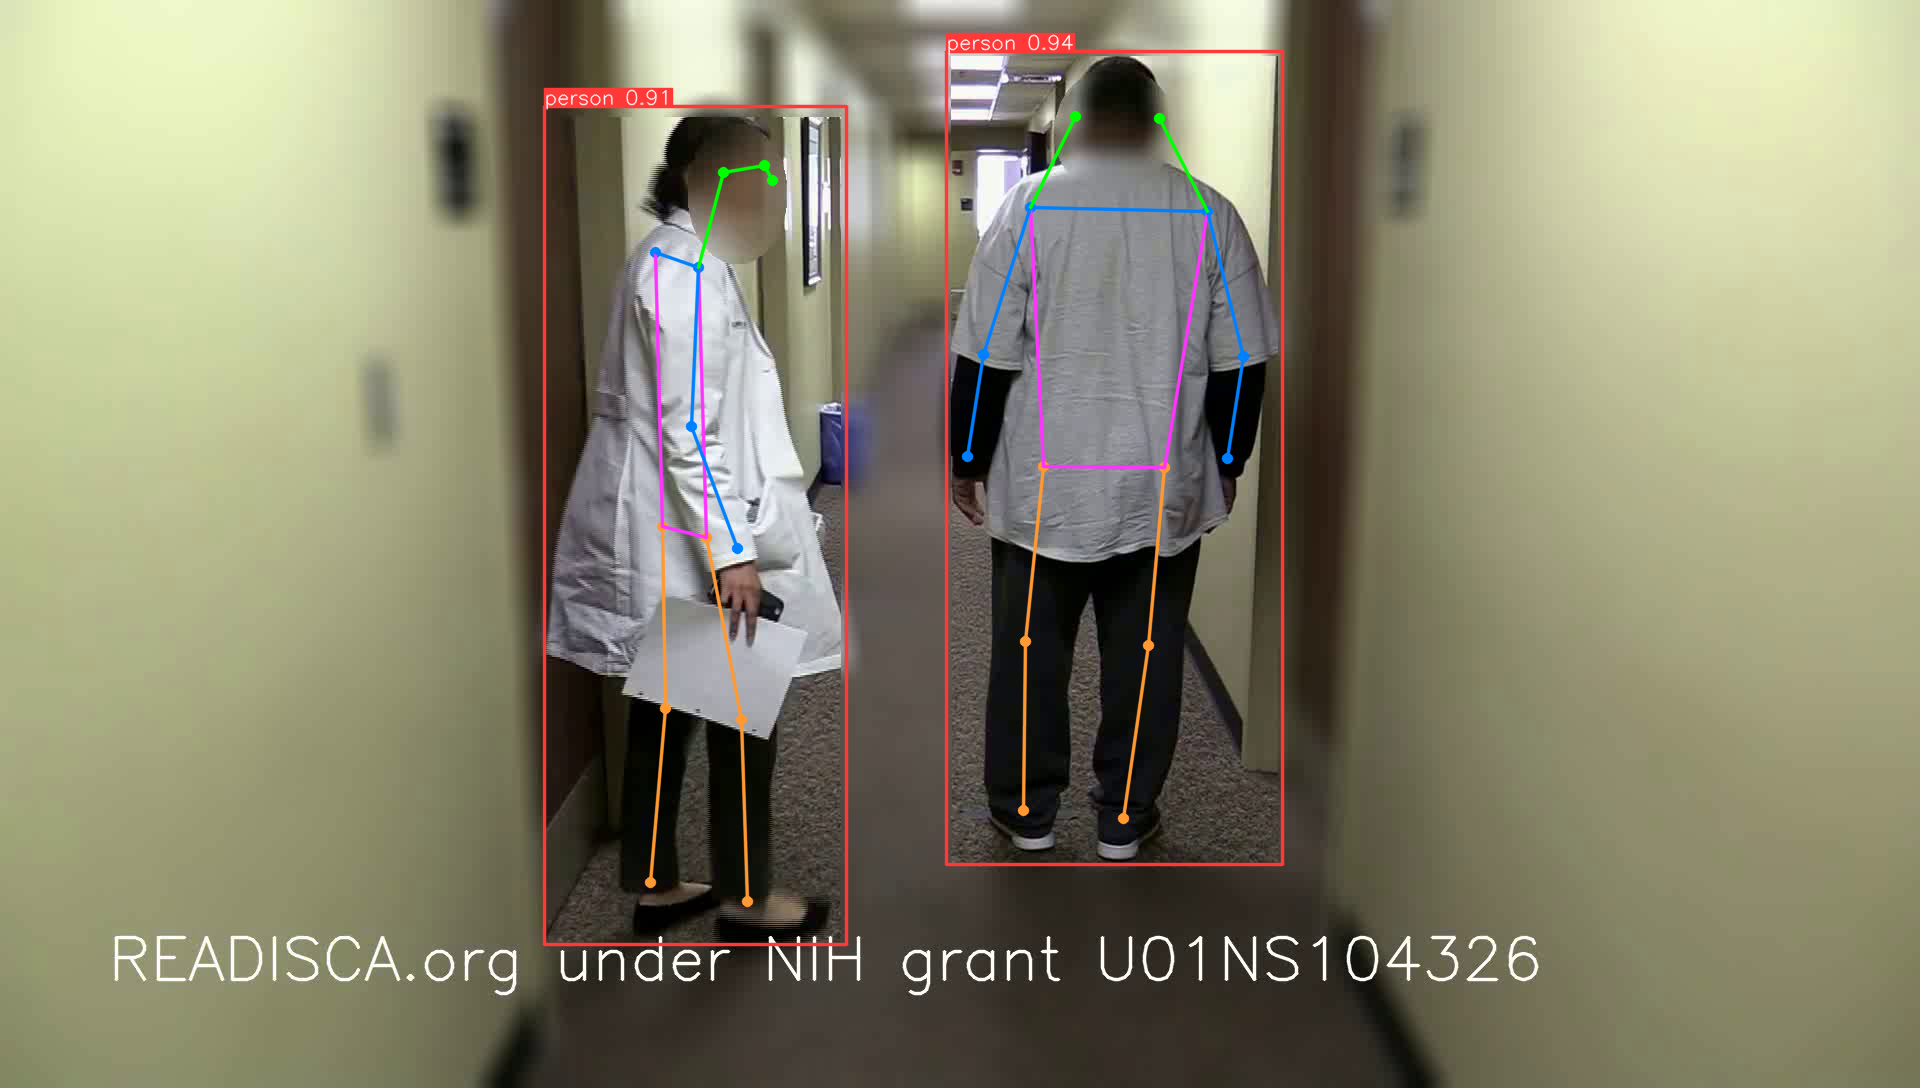

In [110]:
cv2_imshow(pose[0][0].plot(conf = True, labels = True, line_width = 2, kpt_radius = 5, font_size = 12))

In [ ]:
for _, _, files in os.walk("../yolov7-pose-estimation/videos/Ataxia Dataset/Data"):
  file = [f if f.endswith('.mp4') else None for f in files]
  print(sorted(file))

['0.mp4', '1.mp4', '10.mp4', '100.mp4', '101.mp4', '102.mp4', '103.mp4', '104.mp4', '105.mp4', '106.mp4', '107.mp4', '108.mp4', '109.mp4', '11.mp4', '110.mp4', '111.mp4', '112.mp4', '113.mp4', '114.mp4', '115.mp4', '116.mp4', '117.mp4', '118.mp4', '119.mp4', '120.mp4', '121.mp4', '122.mp4', '123.mp4', '124.mp4', '125.mp4', '126.mp4', '127.mp4', '128.mp4', '129.mp4', '13.mp4', '130.mp4', '131.mp4', '132.mp4', '133.mp4', '134.mp4', '135.mp4', '136.mp4', '137.mp4', '138.mp4', '139.mp4', '14.mp4', '140.mp4', '141.mp4', '142.mp4', '143.mp4', '144.mp4', '145.mp4', '146.mp4', '147.mp4', '148.mp4', '149.mp4', '15.mp4', '150.mp4', '151.mp4', '16.mp4', '17.mp4', '18.mp4', '19.mp4', '2.mp4', '20.mp4', '21.mp4', '22.mp4', '23.mp4', '24.mp4', '25.mp4', '26.mp4', '27.mp4', '28.mp4', '29.mp4', '3.mp4', '30.mp4', '31.mp4', '32.mp4', '33.mp4', '34.mp4', '35.mp4', '36.mp4', '37.mp4', '38.mp4', '39.mp4', '4.mp4', '40.mp4', '41.mp4', '42.mp4', '43.mp4', '44.mp4', '45.mp4', '46.mp4', '47.mp4', '48.mp4', '4

In [ ]:
video.files

In [86]:
video.pose[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: ultralytics.engine.results.Keypoints object
masks: None
names: {0: 'person'}
orig_img: array([[[224, 238, 230],
        [224, 238, 230],
        [224, 238, 230],
        ...,
        [168, 180, 177],
        [168, 180, 177],
        [168, 180, 177]],

       [[224, 238, 230],
        [224, 238, 230],
        [224, 238, 230],
        ...,
        [168, 180, 177],
        [168, 180, 177],
        [168, 180, 177]],

       [[224, 238, 230],
        [224, 238, 230],
        [224, 238, 230],
        ...,
        [168, 180, 177],
        [168, 180, 177],
        [168, 180, 177]],

       ...,

       [[ 74,  71,  72],
        [ 75,  72,  73],
        [ 75,  72,  73],
        ...,
        [176, 191, 189],
        [176, 191, 189],
        [176, 191, 189]],

       [[ 74,  71,  72],
        [ 75,  72,  73],
        [ 75,  72,  73],
        ...,
        [176, 191, 189],
        [